In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import folium

In [2]:
df = pd.read_csv('../data/preprocessed/location_added_cleaned.csv').drop('Unnamed: 0', axis=1)

## Feature Engineering

In [ ]:
def feature_engineering(df):
    df['price_per_sqm'] = df['price'] / df['squer']
    df = df.dropna()
    return df

### Custom Transformer for Feature Engineering

In [4]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['price_per_sqm'] = X['price'] / X['squer']
        X.dropna(subset=['price_per_sqm'], inplace=True)
        return X

In [5]:
pipeline = Pipeline([
    ('Feature_engineering', FeatureEngineeringTransformer())
])

df = pipeline.fit_transform(df)
df

,title,price,squer,room,city,addres,floor,metr,new_rem,auction,quiet_area,furniture,center,parking,full_address,latitude,longitude,price_per_sqm
0,вул. Віри Надії Любові,120000,77,2,Львів,Шевченківський\n ·,4,1527,1,0,0,0,0,0,"вул. Віри Надії Любові, Львів, Україна",49.877640,24.036435,1558.441558
1,вул. Любінська,55000,44,2,Львів,Залізничний\n ·,1,1259,0,0,1,0,0,0,"вул. Любінська, Львів, Україна",49.827064,23.982754,1250.000000
2,"вул. Городоцька, 226А",83000,39,1,Львів,Залізничний\n ·,9,2128,0,0,1,0,0,0,"вул. Городоцька, 226А, Львів, Україна",49.827723,23.947917,2128.205128
3,вул. Яцкова Михайла,128000,105,3,Львів,Шевченківський\n ·,5,1224,0,0,0,0,0,0,"вул. Яцкова Михайла, Львів, Україна",49.848317,24.005039,1219.047619
4,просп. Червоної Калини,130000,163,4,Львів,Сихівський\n ·,3,796,0,0,1,0,0,0,"просп. Червоної Калини, Львів, Україна",49.803775,24.046454,797.546012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,"вул. Руська, 235Д",65000,69,3,Чернівці,Першотравневий\n ·,1,942,0,0,0,0,0,0,"вул. Руська, 235Д, Чернівці, Україна",48.279536,25.984412,942.028986
1623,"вул. Руська, 223",52500,60,2,Чернівці,Гравітон\n ·,9,875,0,0,0,0,0,0,"вул. Руська, 223, Чернівці, Україна",48.282558,25.981849,875.000000
1624,"вул. Руська, 235В",60000,65,1,Чернівці,Першотравневий\n ·,1,923,0,0,1,0,0,0,"вул. Руська, 235В, Чернівці, Україна",48.278908,25.983875,923.076923
1625,"вул. Героїв Майдану, 154",97000,72,2,Чернівці,Комарова-Красноармійська\n ...,6,1347,0,0,0,0,0,0,"вул. Героїв Майдану, 154, Чернівці, Україна",48.273229,25.928530,1347.222222


In [6]:
X = df[['squer', 'room', 'floor', 'metr', 'new_rem', 'auction', 'quiet_area', 'furniture', 'center', 'parking', 'price_per_sqm']]
y = df['price']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
model.score(X_train_scaled, y_train)

0.7748672270285454

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

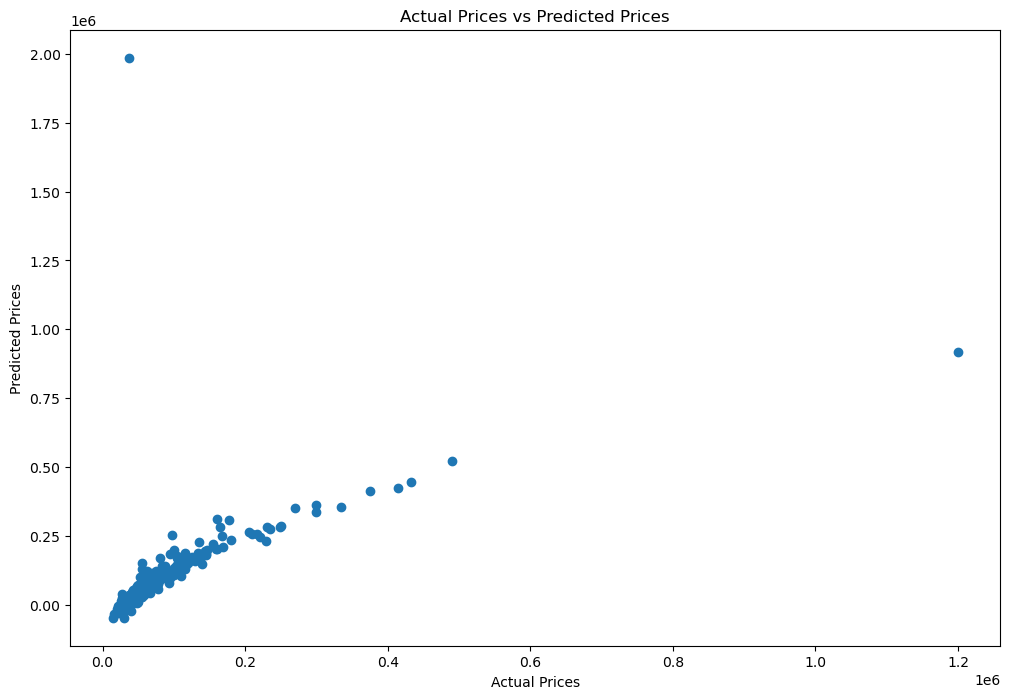

In [18]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, model.predict(X_test_scaled))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

### Random Forest

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
    
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Model Mean Squared Error: {mse}')

Model Mean Squared Error: 597652753.6385696


In [13]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.976172361866456

In [12]:
def visualize_predictions(df, model):
    df['predicted_price'] = model.predict(df[['squer', 'room', 'floor', 'metr', 'new_rem', 'auction', 'quiet_area', 'furniture', 'center', 'parking', 'price_per_sqm']])
    
    # Plotting on the map
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    folium_map = folium.Map(location=map_center, zoom_start=7)
    
    for index, row in df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Price: ${row['price']}, Predicted: ${row['predicted_price']}",
            tooltip=row['title']
        ).add_to(folium_map)
    
    folium_map.save('ukraine_real_estate_map.html')
    print("Map has been saved to 'ukraine_real_estate_map.html'")

visualize_predictions(df, model)

Map has been saved to 'ukraine_real_estate_map.html'
